# Import Libraries

In [97]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Importing data sets

In [98]:
rawHisTransDF=pd.read_csv('Historical-transaction-data.csv')
rawStoreInfDF=pd.read_csv('Store-info.csv')
rawTestDF=pd.read_csv('Testing-data.csv')

# Viewing data frame

In [99]:
rawHisTransDF.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


In [100]:
rawStoreInfDF.head()

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low


# Data Pre processing

#### Fixing data

In [101]:
# convert the date string column to datetime
rawHisTransDF['transaction_date'] = pd.to_datetime(rawHisTransDF['transaction_date'], format='%Y/%m/%d').dt.date

In [102]:
# get count of null values in each column
null_counts = rawHisTransDF.isnull().sum()
# print the counts
print(null_counts)

item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
dtype: int64


In [103]:
rawHisTransDF.dropna(subset=['item_description','invoice_id'], inplace=True)

In [104]:
# get count of null values in each column
null_counts = rawHisTransDF.isnull().sum()
# print the counts
print(null_counts)

item_description    0
transaction_date    0
invoice_id          0
customer_id         0
shop_id             0
item_price          0
quantity_sold       0
dtype: int64


In [105]:
rawHisTransDF=rawHisTransDF.drop_duplicates()

# Encoding

In [106]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
rawHisTransDF['item_description'] = le.fit_transform(rawHisTransDF['item_description'])
rawHisTransDF['customer_id'] = le.fit_transform(rawHisTransDF['customer_id'])
rawHisTransDF['shop_id'] = rawHisTransDF['shop_id'].str.replace(r'^SHOP', '').astype(int)
rawStoreInfDF['shop_id'] = rawStoreInfDF['shop_id'].str.replace(r'^SHOP', '').astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4584\1857105866.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  rawHisTransDF['shop_id'] = rawHisTransDF['shop_id'].str.replace(r'^SHOP', '').astype(int)
C:\Users\DELL\AppData\Local\Temp\ipykernel_4584\1857105866.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  rawStoreInfDF['shop_id'] = rawStoreInfDF['shop_id'].str.replace(r'^SHOP', '').astype(int)


In [107]:
rawStoreInfDF['shop_profile'] = rawStoreInfDF['shop_profile'].replace({'High': 1, 'Moderate': 2, 'Low': 3})
rawStoreInfDF['shop_profile'] = rawStoreInfDF['shop_profile'].fillna(0.0).astype(int)
rawHisTransDF['invoice_id'] = rawHisTransDF['invoice_id'].astype(int)

In [108]:
rawStoreInfDF

,shop_id,shop_area_sq_ft,shop_profile
0,47,528,2
1,9,676,1
2,83,676,3
3,117,676,3
4,42,676,3
...,...,...,...
119,87,527,0
120,50,411,0
121,61,699,0
122,56,597,0


In [109]:
rawHisTransDF

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,27,2021-12-11,147,57272,8,220,2
1,14,2021-10-17,371,91334,112,220,2
2,35,2021-12-13,484,158179,8,160,2
3,4,2021-12-13,484,158179,8,150,2
4,34,2021-10-23,1310,38862,112,210,5
...,...,...,...,...,...,...,...
473820,13,2021-11-14,8014206,176899,3,60,2
473821,1,2021-10-16,8304754,52159,127,35,2
473822,14,2021-10-16,8304807,95280,127,220,1
473823,1,2021-11-07,8313570,8748,127,35,1


# Feature Creation

In [110]:
# group the dataframe by the 'group' column and get the size of each group
transactions_by_shop = rawHisTransDF.groupby('shop_id').size().reset_index()

# rename columns of the new dataframe
transactions_by_shop.columns = ['shop_id', 'num_of_transactions']

In [111]:
# rawStoreInfDF['transaction_by_shop']=transactions_by_shop
rawStoreInfDF = pd.merge(rawStoreInfDF, transactions_by_shop, on='shop_id')
rawStoreInfDF

,shop_id,shop_area_sq_ft,shop_profile,num_of_transactions
0,47,528,2,1396
1,9,676,1,3688
2,83,676,3,2981
3,117,676,3,3544
4,42,676,3,2683
...,...,...,...,...
119,87,527,0,1713
120,50,411,0,3554
121,61,699,0,2761
122,56,597,0,4846


In [112]:
# get count of null values in each column
null_counts = rawStoreInfDF.isnull().sum()
# print the counts
print(null_counts)

shop_id                0
shop_area_sq_ft        0
shop_profile           0
num_of_transactions    0
dtype: int64


In [113]:
output=pd.read_csv('output.csv')

In [114]:
# output = output[['item_description','transaction_date','invoice_id','customer_id','item_price']]
output = output[['shop_id', 'Daily_Sales_avg', 'revnew', 'rev_per_sqfeet', 'avd_daily_items_types_sold', 'avd_daily_transctions', 'avd_daily_custemers', 'avg_visits']]

In [115]:
output =output.drop_duplicates()
output

,shop_id,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers,avg_visits
0,8,37040.173913,121225,179,16,32,32,127
230,112,21033.243045,1085400,1625,16,28,27,166
2279,55,17080.175867,794195,1103,17,32,31,163
4326,3,32080.320166,1667950,2059,19,43,43,162
7465,71,14524.536474,777515,1104,16,27,27,146
...,...,...,...,...,...,...,...,...
378392,126,29741.977432,1623175,4949,18,37,37,170
381095,70,22883.951647,1206265,1784,16,31,31,179
383432,2,51150.466469,2645315,4153,20,55,55,170
387473,127,60489.258112,3090710,3645,20,46,45,163


In [116]:
# rawStoreInfDF['transaction_by_shop']=transactions_by_shop
rawStoreInfDF = pd.merge(rawStoreInfDF, output, on='shop_id')
rawStoreInfDF

,shop_id,shop_area_sq_ft,shop_profile,num_of_transactions,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers,avg_visits
0,47,528,2,1396,12942.461651,697510,1321,12,19,18,164
1,9,676,1,3688,30764.239580,1605555,2375,21,49,49,166
2,83,676,3,2981,27360.354452,1476445,2184,19,39,39,172
3,117,676,3,3544,38445.995702,2033385,3008,20,47,47,186
4,42,676,3,2683,21678.661223,1133820,1677,18,36,36,160
...,...,...,...,...,...,...,...,...,...,...,...
119,87,527,0,1713,20176.512253,1048015,1989,13,22,22,168
120,50,411,0,3554,42217.525685,2133300,5191,18,48,48,208
121,61,699,0,2761,44238.682756,1983470,2838,17,36,35,166
122,56,597,0,4846,46307.680336,2494620,4179,24,64,64,182


In [117]:
rawStoreInfDF=rawStoreInfDF.drop(['avd_daily_transctions','revnew','avd_daily_custemers','num_of_transactions'], axis=1)

In [118]:
rawStoreInfDF=rawStoreInfDF.drop_duplicates()
rawStoreInfDF

,shop_id,shop_area_sq_ft,shop_profile,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits
0,47,528,2,12942.461651,1321,12,164
1,9,676,1,30764.239580,2375,21,166
2,83,676,3,27360.354452,2184,19,172
3,117,676,3,38445.995702,3008,20,186
4,42,676,3,21678.661223,1677,18,160
...,...,...,...,...,...,...,...
119,87,527,0,20176.512253,1989,13,168
120,50,411,0,42217.525685,5191,18,208
121,61,699,0,44238.682756,2838,17,166
122,56,597,0,46307.680336,4179,24,182


#### Scaling

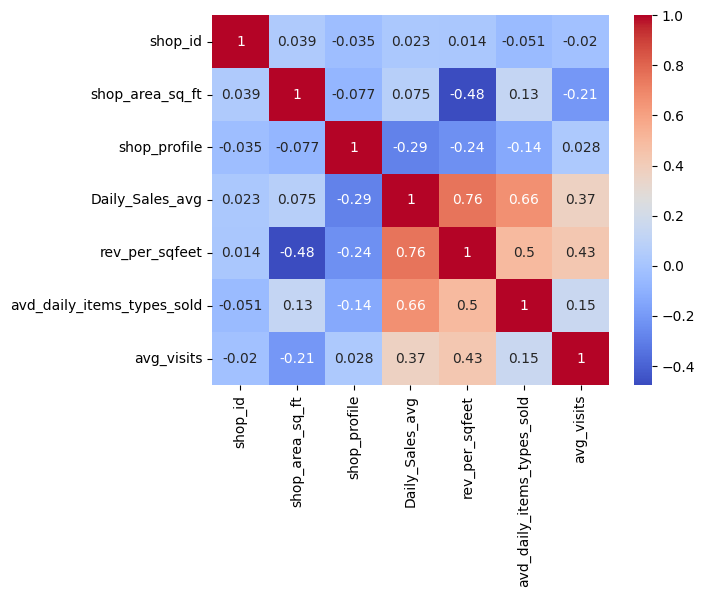

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load your data into a pandas dataframe
# df = pd.read_csv('your_data.csv')

# compute the correlation matrix
corr_matrix = rawStoreInfDF.corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


# Split to train and test data

In [120]:
# Split the DataFrame into two based on column B
TestDF = rawStoreInfDF[rawStoreInfDF['shop_profile'] == 0].drop(['shop_profile'], axis=1)
TrainDF = rawStoreInfDF[rawStoreInfDF['shop_profile'] != 0]

In [121]:
TestDF

,shop_id,shop_area_sq_ft,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits
100,46,545,48683.418675,4572,19,184
101,24,676,21074.296327,1751,17,160
102,23,617,38921.563346,3719,20,167
103,97,310,35220.327035,6170,19,179
104,44,715,22137.931879,1563,15,158
105,30,530,51395.589058,4875,20,208
106,38,411,26162.685152,3234,17,166
107,29,597,32387.482462,2837,19,168
108,96,676,47391.326326,3441,20,176
109,92,617,26578.650994,2596,20,157


In [122]:
# Split Fulldata into training and testing sets
from sklearn.model_selection import train_test_split

column_name = 'shop_id'
unique_categories = TrainDF[column_name].nunique()
categories_in_dataset_1 = int(unique_categories * 0.5)
categories_in_dataset_2 = unique_categories - categories_in_dataset_1
dataset_1_categories = TrainDF[column_name].unique()[:categories_in_dataset_1]
dataset_2_categories = TrainDF[column_name].unique()[categories_in_dataset_1:]

train_data = TrainDF[TrainDF[column_name].isin(dataset_1_categories)]
test_data = TrainDF[TrainDF[column_name].isin(dataset_2_categories)]





#train_data, test_data = train_test_split(TrainDF, test_size=0.01)

In [123]:
train_data

,shop_id,shop_area_sq_ft,shop_profile,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits
0,47,528,2,12942.461651,1321,12,164
1,9,676,1,30764.239580,2375,21,166
2,83,676,3,27360.354452,2184,19,172
3,117,676,3,38445.995702,3008,20,186
4,42,676,3,21678.661223,1677,18,160
5,34,494,3,21688.372569,2296,15,167
6,100,617,2,43696.960809,3641,21,175
7,57,423,2,23000.674875,2852,17,183
8,98,676,3,49743.799412,3463,19,195
9,123,735,2,15805.588585,1123,14,163


In [124]:
train_data

,shop_id,shop_area_sq_ft,shop_profile,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avg_visits
0,47,528,2,12942.461651,1321,12,164
1,9,676,1,30764.239580,2375,21,166
2,83,676,3,27360.354452,2184,19,172
3,117,676,3,38445.995702,3008,20,186
4,42,676,3,21678.661223,1677,18,160
5,34,494,3,21688.372569,2296,15,167
6,100,617,2,43696.960809,3641,21,175
7,57,423,2,23000.674875,2852,17,183
8,98,676,3,49743.799412,3463,19,195
9,123,735,2,15805.588585,1123,14,163


In [125]:
expectedResult=test_data[['shop_id','shop_profile']]


In [126]:
expectedResult

,shop_id,shop_profile
50,14,2
51,8,2
52,89,2
53,75,1
54,20,2
55,86,1
56,26,2
57,68,3
58,90,2
59,22,1


In [127]:
shop_id_x_test = test_data['shop_id']
shop_id_x_TestDF = TestDF['shop_id']
TestDF=TestDF.drop('shop_id',axis=1)
train_data=train_data.drop('shop_id', axis=1)
test_data=test_data.drop('shop_id',axis=1)

In [128]:
X_train=train_data.drop(['shop_profile'], axis=1)
y_train=train_data['shop_profile']
X_test= test_data.drop(['shop_profile'], axis=1)
y_test=test_data['shop_profile']
X_testres = X_test.reset_index(drop=True)

In [129]:
# from sklearn.preprocessing import RobustScaler
# import pandas as pd

# # Create an instance of RobustScaler
# scaler = RobustScaler()

# temp_X_train=X_train
# temp_x_test=X_test
# temp_TestDF=TestDF
# # Scale the data
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)
# TestDF = scaler.fit_transform(TestDF)

# # Convert the scaled data back to a pandas dataframe
# X_train = pd.DataFrame(X_train, columns=temp_X_train.columns)
# X_test = pd.DataFrame(X_test, columns=temp_x_test.columns)
# TestDF = pd.DataFrame(TestDF, columns=temp_TestDF.columns)




In [130]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Define the logistic regression model
model_random = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=10)

# Train the model on the training data
model_random.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model_random.predict(X_test)
predictions_Test_randomforest=model_random.predict(TestDF)

accu = accuracy_score(y_test, predictions)

print(accu)
# print(f1_score(y_test, predictions, average=None))



0.54


In [131]:
predictions_Test_randomforest

array([3, 3, 3, 2, 2, 1, 2, 3, 3, 3, 2, 3, 3, 1, 3, 3, 1, 3, 1, 2, 1, 2,
       3, 3])

In [132]:
predDf=pd.DataFrame(predictions, columns=['shop_profile'])
predDf_Test_randomforest=pd.DataFrame(predictions_Test_randomforest, columns=['shop_profile'])

In [133]:
predDf

,shop_profile
0,2
1,3
2,1
3,1
4,2
5,1
6,3
7,3
8,2
9,2


In [134]:
shop_id_x_TestDF

100     46
101     24
102     23
103     97
104     44
105     30
106     38
107     29
108     96
109     92
110     81
111     76
112     80
113     74
114    107
115    108
116     19
117      2
118    114
119     87
120     50
121     61
122     56
123     70
Name: shop_id, dtype: int32

In [135]:
shop_id_x_test=shop_id_x_test.reset_index()
shop_id_x_TestDF=shop_id_x_TestDF.reset_index()

In [136]:
shop_id_x_TestDF=shop_id_x_TestDF.drop('index',axis=1)

In [137]:
# Concatenate DataFrames
concatenatedRes_df = pd.concat([shop_id_x_test, predDf], axis=1)
# concatenatedRes_df = pd.concat([concatenatedRes_df, shop_id_x_test], axis=1)
# concatenated_df = pd.concat([shop_id_x_test, predDf], ignore_index=True)
concatenatedRes_df_random = pd.concat([shop_id_x_TestDF, predDf_Test_randomforest], axis=1)

In [138]:
concatenatedRes_df_random

,shop_id,shop_profile
0,46,3
1,24,3
2,23,3
3,97,2
4,44,2
5,30,1
6,38,2
7,29,3
8,96,3
9,92,3


In [139]:
concatenatedRes_df_random['shop_profile'] = concatenatedRes_df_random['shop_profile'].replace({1: 'High', 2: 'Moderate', 3: 'Low'})

In [140]:
concatenatedRes_df_random.to_csv('final.csv',index=False)

In [141]:
final = pd.read_csv('final.csv')

In [142]:
concatenatedRes_df

,index,shop_id,shop_profile
0,50,14,2
1,51,8,3
2,52,89,1
3,53,75,1
4,54,20,2
5,55,86,1
6,56,26,3
7,57,68,3
8,58,90,2
9,59,22,2


In [143]:
expectedResult

,shop_id,shop_profile
50,14,2
51,8,2
52,89,2
53,75,1
54,20,2
55,86,1
56,26,2
57,68,3
58,90,2
59,22,1


In [144]:
concatenatedRes_df

,index,shop_id,shop_profile
0,50,14,2
1,51,8,3
2,52,89,1
3,53,75,1
4,54,20,2
5,55,86,1
6,56,26,3
7,57,68,3
8,58,90,2
9,59,22,2


In [145]:
expectedResult=expectedResult['shop_profile']
concatenatedRes_df=concatenatedRes_df['shop_profile']

In [146]:
# Calculate F1 score for each class
f1_class0 = f1_score(expectedResult, concatenatedRes_df, labels=[1], average='weighted')
f1_class1 = f1_score(expectedResult, concatenatedRes_df, labels=[2], average='weighted')
f1_class2 = f1_score(expectedResult, concatenatedRes_df, labels=[3], average='weighted')

# Calculate average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")

F1 score for class 0: 0.68
F1 score for class 1: 0.45
F1 score for class 2: 0.45
Average F1 score: 0.53


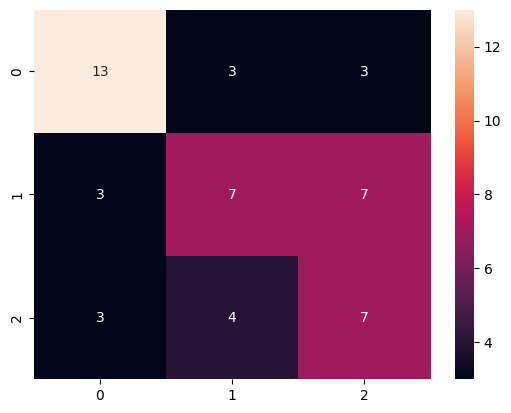

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
matrix = confusion_matrix(expectedResult, concatenatedRes_df)

# Visualize confusion matrix
sns.heatmap(matrix, annot=True)
plt.show()

In [148]:
y_train = y_train.replace({1: 0, 2: 1, 3: 2})
y_test = y_test.replace({1: 0, 2: 1, 3: 2})

In [149]:
import xgboost as xgb

# define the XGBoost model
model_xg = xgb.XGBClassifier(objective='multi:softmax', random_state=42)

# train the model on the training data
model_xg.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model_xg.predict(X_test)
y_pred_Test_xgb=model_xg.predict(TestDF)

# calculate the accuracy score of the predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.00%


In [150]:
predDf_xg=pd.DataFrame(y_pred, columns=['shop_profile'])
predDf_xg_Test=pd.DataFrame(y_pred_Test_xgb, columns=['shop_profile'])

In [151]:
# Concatenate DataFrames
concatenatedRes_df_xg = pd.concat([shop_id_x_test, predDf_xg], axis=1)
# concatenatedRes_df = pd.concat([concatenatedRes_df, shop_id_x_test], axis=1)
# concatenated_df = pd.concat([shop_id_x_test, predDf], ignore_index=True)
concatenatedRes_df_xg_Test = pd.concat([shop_id_x_TestDF, predDf_xg_Test], axis=1)

In [152]:
concatenatedRes_df_xg_Test

,shop_id,shop_profile
0,46,0
1,24,2
2,23,1
3,97,1
4,44,1
5,30,2
6,38,1
7,29,1
8,96,2
9,92,2


In [153]:
concatenatedRes_df_xg_Test['shop_profile'] = concatenatedRes_df_xg_Test['shop_profile'].replace({0: 'High', 1: 'Moderate', 2: 'Low'})

In [154]:
final=pd.concat([final,concatenatedRes_df_xg_Test], axis=1)

In [155]:
final.to_csv('final.csv',index=False)

In [156]:
# expectedResult=expectedResult['shop_profile']
concatenatedRes_df_xg=concatenatedRes_df_xg['shop_profile']

In [157]:
y_train = y_train.replace({0: 1, 1: 2, 2: 3})
y_test = y_test.replace({0: 1, 1: 2, 2: 3})

In [158]:
# Calculate F1 score for each class
f1_class0 = f1_score(expectedResult, concatenatedRes_df_xg, labels=[1], average='weighted')
f1_class1 = f1_score(expectedResult, concatenatedRes_df_xg, labels=[2], average='weighted')
f1_class2 = f1_score(expectedResult, concatenatedRes_df_xg, labels=[3], average='weighted')

# Calculate average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")

F1 score for class 0: 0.30
F1 score for class 1: 0.53
F1 score for class 2: 0.00
Average F1 score: 0.28


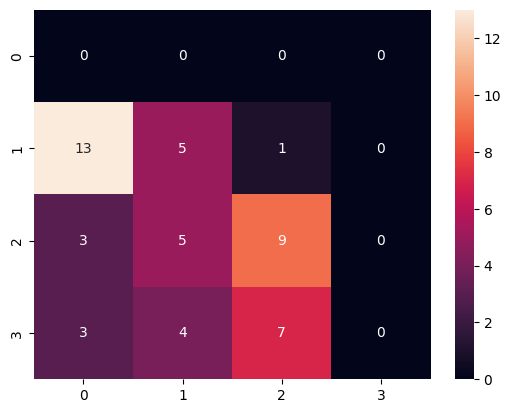

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
matrix = confusion_matrix(expectedResult, concatenatedRes_df_xg)

# Visualize confusion matrix
sns.heatmap(matrix, annot=True)
plt.show()

In [160]:
from sklearn.neighbors import KNeighborsClassifier
# define the KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)

# train the model on the training data
model_knn.fit(X_train, y_train)

# make predictions on the testing data
y_pred_knn = model_knn.predict(X_test)
y_pred_knn_Test = model_knn.predict(TestDF)

# calculate the accuracy score of the predictions
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.00%


In [161]:
predDf_knn=pd.DataFrame(y_pred_knn, columns=['shop_profile'])
predDf_knn_Test=pd.DataFrame(y_pred_knn_Test, columns=['shop_profile'])
# Concatenate DataFrames
concatenatedRes_df_knn = pd.concat([shop_id_x_test, predDf_knn], axis=1)
concatenatedRes_df_knn_Test = pd.concat([shop_id_x_TestDF, predDf_knn_Test], axis=1)
# concatenatedRes_df = pd.concat([concatenatedRes_df, shop_id_x_test], axis=1)
# concatenated_df = pd.concat([shop_id_x_test, predDf], ignore_index=True)
# expectedResult=expectedResult['shop_profile']
concatenatedRes_df_knn=concatenatedRes_df_knn['shop_profile']

In [162]:
concatenatedRes_df_knn_Test

,shop_id,shop_profile
0,46,2
1,24,3
2,23,1
3,97,1
4,44,3
5,30,2
6,38,3
7,29,1
8,96,2
9,92,3


In [163]:
concatenatedRes_df_knn_Test['shop_profile'] = concatenatedRes_df_knn_Test['shop_profile'].replace({1: 'High', 2: 'Moderate', 3: 'Low'})

In [164]:
final = pd.concat([final,concatenatedRes_df_knn_Test],axis=1)
final.to_csv('final.csv',index=False)

In [165]:
# Calculate F1 score for each class
f1_class0 = f1_score(expectedResult, concatenatedRes_df_knn, labels=[1], average='weighted')
f1_class1 = f1_score(expectedResult, concatenatedRes_df_knn, labels=[2], average='weighted')
f1_class2 = f1_score(expectedResult, concatenatedRes_df_knn, labels=[3], average='weighted')

# Calculate average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")

F1 score for class 0: 0.65
F1 score for class 1: 0.32
F1 score for class 2: 0.41
Average F1 score: 0.46


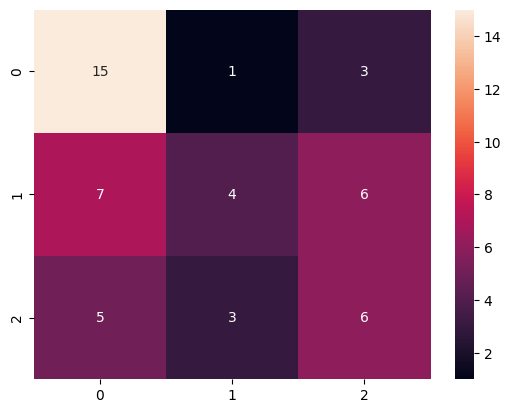

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
matrix = confusion_matrix(expectedResult, concatenatedRes_df_knn)

# Visualize confusion matrix
sns.heatmap(matrix, annot=True)
plt.show()

---------------------------------------------------------------------------------------------------------------------

In [167]:
from sklearn.tree import DecisionTreeClassifier
# define the KNN model
clf = DecisionTreeClassifier()

# train the model on the training data
clf.fit(X_train, y_train)

# make predictions on the testing data
y_pred_clf = model_knn.predict(X_test)
y_pred_clf_Test = model_knn.predict(TestDF)

# calculate the accuracy score of the predictions
accuracy = accuracy_score(y_test, y_pred_clf)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.00%


In [168]:
predDf_clf=pd.DataFrame(y_pred_clf, columns=['shop_profile'])
predDf_clf_Test=pd.DataFrame(y_pred_clf_Test, columns=['shop_profile'])
# Concatenate DataFrames
concatenatedRes_df_clf = pd.concat([shop_id_x_test, predDf_clf], axis=1)
concatenatedRes_df_clf_Test = pd.concat([shop_id_x_TestDF, predDf_clf_Test], axis=1)
# concatenatedRes_df = pd.concat([concatenatedRes_df, shop_id_x_test], axis=1)
# concatenated_df = pd.concat([shop_id_x_test, predDf], ignore_index=True)
# expectedResult=expectedResult['shop_profile']
concatenatedRes_df_clf=concatenatedRes_df_clf['shop_profile']

In [169]:
concatenatedRes_df_clf_Test

,shop_id,shop_profile
0,46,2
1,24,3
2,23,1
3,97,1
4,44,3
5,30,2
6,38,3
7,29,1
8,96,2
9,92,3


In [170]:
# Calculate F1 score for each class
f1_class0 = f1_score(expectedResult, concatenatedRes_df_clf, labels=[1], average='weighted')
f1_class1 = f1_score(expectedResult, concatenatedRes_df_clf, labels=[2], average='weighted')
f1_class2 = f1_score(expectedResult, concatenatedRes_df_clf, labels=[3], average='weighted')

# Calculate average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")

F1 score for class 0: 0.65
F1 score for class 1: 0.32
F1 score for class 2: 0.41
Average F1 score: 0.46


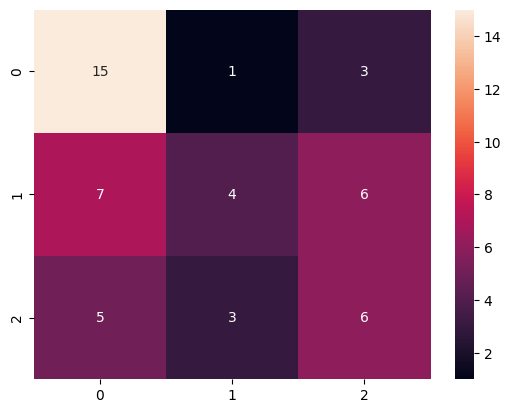

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
matrix = confusion_matrix(expectedResult, concatenatedRes_df_clf)

# Visualize confusion matrix
sns.heatmap(matrix, annot=True)
plt.show()

In [172]:
# # Import necessary libraries
# from keras.models import Sequential
# from keras.layers import Dense
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.metrics import accuracy_score

# # One-hot encode the target variable
# enc = OneHotEncoder()
# y_train = enc.fit_transform(y_train.reshape(-1, 1)).toarray()
# y_test = enc.transform(y_test.reshape(-1, 1)).toarray()

# # Create a neural network model
# model = Sequential()
# model.add(Dense(10, input_dim=4, activation='relu'))
# model.add(Dense(3, activation='softmax'))

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model on the training data
# model.fit(X_train, y_train, epochs=50, batch_size=10)

# # Predict the classes of the testing data
# y_pred = model.predict_classes(X_test)

# # Decode one-hot encoded labels back to original labels
# y_test = enc.inverse_transform(y_test)
# y_pred = enc.inverse_transform(y_pred.reshape(-1, 1))

# # Calculate the accuracy of the classifier
# accuracy = accuracy_score(y_test, y_pred)

# # Print the accuracy of the classifier
# print("Accuracy:", accuracy)

#### Ensembling

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Train the first set of models
model1 = LogisticRegression()
model1.fit(X_train, y_train)

model2 = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=10)
model2.fit(X_train, y_train)

# Make predictions on the testing set using the first set of models
y_pred_1 = model1.predict(X_test)
y_pred_2 = model2.predict(X_test)
y_pred_1_test = model1.predict(TestDF)
y_pred_2_test = model2.predict(TestDF)

# Stack the predictions from the first set of models
X_stack = np.column_stack((y_pred_1, y_pred_2))
X_stack_test = np.column_stack((y_pred_1_test,y_pred_2_test))

# Train the final model on the stacked predictions
final_model = LogisticRegression()
final_model.fit(X_stack, y_test)

# Make predictions on the testing set using the final model
y_pred_int = final_model.predict(X_stack)
y_pred_int_test = final_model.predict(X_stack_test)

# Calculate the accuracy of the final predictions
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.28


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [174]:
predDf_int=pd.DataFrame(y_pred_int, columns=['shop_profile'])
predDf_int_Test=pd.DataFrame(y_pred_int_test, columns=['shop_profile'])
# Concatenate DataFrames
concatenatedRes_df_int = pd.concat([shop_id_x_test, predDf_int], axis=1)
concatenatedRes_df_int_Test = pd.concat([shop_id_x_TestDF, predDf_int_Test], axis=1)
# concatenatedRes_df = pd.concat([concatenatedRes_df, shop_id_x_test], axis=1)
# concatenated_df = pd.concat([shop_id_x_test, predDf], ignore_index=True)
# expectedResult=expectedResult['shop_profile']
concatenatedRes_df_int=concatenatedRes_df_int['shop_profile']
concatenatedRes_df_int_Test

,shop_id,shop_profile
0,46,2
1,24,2
2,23,1
3,97,2
4,44,2
5,30,2
6,38,2
7,29,2
8,96,2
9,92,2


In [175]:
# Calculate F1 score for each class
f1_class0 = f1_score(expectedResult, concatenatedRes_df_int, labels=[1], average='weighted')
f1_class1 = f1_score(expectedResult, concatenatedRes_df_int, labels=[2], average='weighted')
f1_class2 = f1_score(expectedResult, concatenatedRes_df_int, labels=[3], average='weighted')

# Calculate average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")

F1 score for class 0: 0.81
F1 score for class 1: 0.56
F1 score for class 2: 0.20
Average F1 score: 0.52


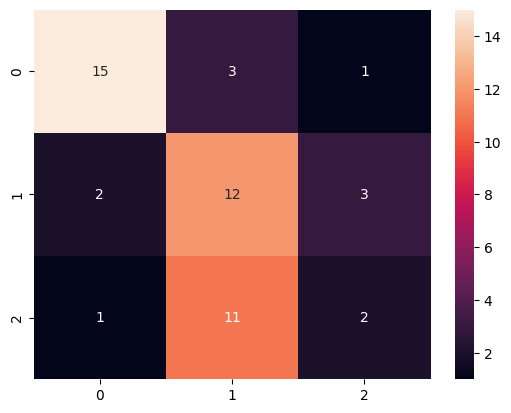

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
matrix = confusion_matrix(expectedResult, concatenatedRes_df_int)

# Visualize confusion matrix
sns.heatmap(matrix, annot=True)
plt.show()

#### Random forest and XGboost

In [177]:
y_train = y_train.replace({1: 0, 2: 1, 3: 2})
y_test = y_test.replace({1: 0, 2: 1, 3: 2})

In [178]:
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Train the first set of models
model1 = xgb.XGBClassifier(objective='multi:softmax', random_state=42)
model1.fit(X_train, y_train)

model2 = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=10)
model2.fit(X_train, y_train)

# Make predictions on the testing set using the first set of models
y_pred_1 = model1.predict(X_test)
y_pred_2 = model2.predict(X_test)
y_pred_1_test = model1.predict(TestDF)
y_pred_2_test = model2.predict(TestDF)

# Stack the predictions from the first set of models
X_stack = np.column_stack((y_pred_1, y_pred_2))
X_stack_test = np.column_stack((y_pred_1_test,y_pred_2_test))

# Train the final model on the stacked predictions
final_model = xgb.XGBClassifier(objective='multi:softmax', random_state=42)
final_model.fit(X_stack, y_test)

# Make predictions on the testing set using the final model
y_pred_int = final_model.predict(X_stack)
y_pred_int_test = final_model.predict(X_stack_test)

# Calculate the accuracy of the final predictions
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.5


In [179]:
y_train = y_train.replace({0: 1, 1: 2, 2: 3})
y_test = y_test.replace({0: 1, 1: 2, 2: 3})

In [180]:
predDf_int=pd.DataFrame(y_pred_int, columns=['shop_profile'])
predDf_int_Test=pd.DataFrame(y_pred_int_test, columns=['shop_profile'])
# Concatenate DataFrames
concatenatedRes_df_int = pd.concat([shop_id_x_test, predDf_int], axis=1)
concatenatedRes_df_int_Test = pd.concat([shop_id_x_TestDF, predDf_int_Test], axis=1)
# concatenatedRes_df = pd.concat([concatenatedRes_df, shop_id_x_test], axis=1)
# concatenated_df = pd.concat([shop_id_x_test, predDf], ignore_index=True)
# expectedResult=expectedResult['shop_profile']
concatenatedRes_df_int=concatenatedRes_df_int['shop_profile']
concatenatedRes_df_int_Test

,shop_id,shop_profile
0,46,0
1,24,1
2,23,2
3,97,1
4,44,1
5,30,2
6,38,1
7,29,1
8,96,2
9,92,1


In [181]:
# Calculate F1 score for each class
f1_class0 = f1_score(expectedResult, concatenatedRes_df_int, labels=[0], average='weighted')
f1_class1 = f1_score(expectedResult, concatenatedRes_df_int, labels=[1], average='weighted')
f1_class2 = f1_score(expectedResult, concatenatedRes_df_int, labels=[2], average='weighted')

# Calculate average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")

F1 score for class 0: 0.00
F1 score for class 1: 0.14
F1 score for class 2: 0.00
Average F1 score: 0.05


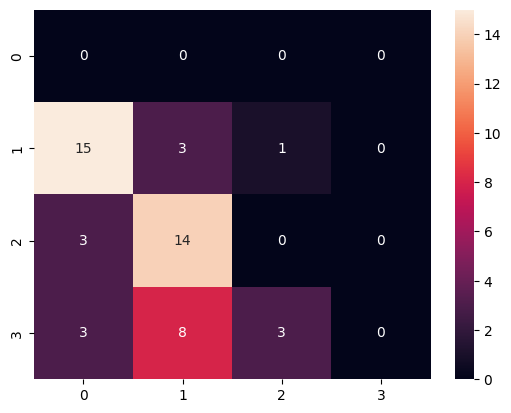

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
matrix = confusion_matrix(expectedResult, concatenatedRes_df_int)

# Visualize confusion matrix
sns.heatmap(matrix, annot=True)
plt.show()

#### Knn and Random Forest

In [183]:
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Train the first set of models
model1 = KNeighborsClassifier(n_neighbors=10)
model1.fit(X_train, y_train)

model2 = RandomForestClassifier(max_depth=100, min_samples_leaf=5, min_samples_split=2, n_estimators=25)
model2.fit(X_train, y_train)

# Make predictions on the testing set using the first set of models
y_pred_1 = model1.predict(X_test)
y_pred_2 = model2.predict(X_test)
y_pred_1_test = model1.predict(TestDF)
y_pred_2_test = model2.predict(TestDF)

# Stack the predictions from the first set of models
X_stack = np.column_stack((y_pred_1, y_pred_2))
X_stack_test = np.column_stack((y_pred_1_test,y_pred_2_test))

# Train the final model on the stacked predictions
final_model = KNeighborsClassifier(n_neighbors=5)
final_model.fit(X_stack, y_test)

# Make predictions on the testing set using the final model
y_pred_int = final_model.predict(X_stack)
y_pred_int_test = final_model.predict(X_stack_test)

# Calculate the accuracy of the final predictions
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.28


In [184]:
predDf_int=pd.DataFrame(y_pred_int, columns=['shop_profile'])
predDf_int_Test=pd.DataFrame(y_pred_int_test, columns=['shop_profile'])
# Concatenate DataFrames
concatenatedRes_df_int = pd.concat([shop_id_x_test, predDf_int], axis=1)
concatenatedRes_df_int_Test = pd.concat([shop_id_x_TestDF, predDf_int_Test], axis=1)
# concatenatedRes_df = pd.concat([concatenatedRes_df, shop_id_x_test], axis=1)
# concatenated_df = pd.concat([shop_id_x_test, predDf], ignore_index=True)
# expectedResult=expectedResult['shop_profile']
concatenatedRes_df_int=concatenatedRes_df_int['shop_profile']
concatenatedRes_df_int_Test

,shop_id,shop_profile
0,46,3
1,24,2
2,23,1
3,97,1
4,44,2
5,30,3
6,38,2
7,29,2
8,96,1
9,92,2


In [185]:
# Calculate F1 score for each class
f1_class0 = f1_score(expectedResult, concatenatedRes_df_int, labels=[0], average='weighted')
f1_class1 = f1_score(expectedResult, concatenatedRes_df_int, labels=[1], average='weighted')
f1_class2 = f1_score(expectedResult, concatenatedRes_df_int, labels=[2], average='weighted')

# Calculate average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")

F1 score for class 0: 0.00
F1 score for class 1: 0.68
F1 score for class 2: 0.57
Average F1 score: 0.42


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


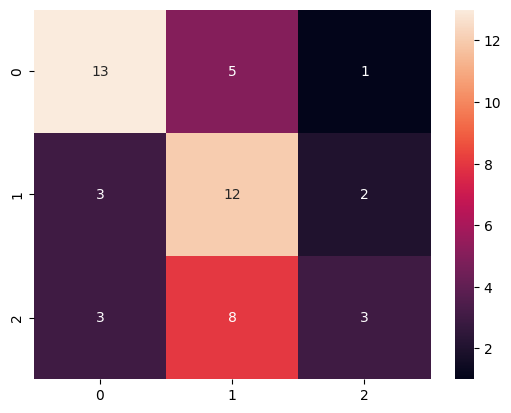

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
matrix = confusion_matrix(expectedResult, concatenatedRes_df_int)

# Visualize confusion matrix
sns.heatmap(matrix, annot=True)
plt.show()